<img src="https://raw.githubusercontent.com/harmonize-tools/socio4health/main/docs/source/_static/image.png" alt="image info" height="100" width="100"/>


# Hands-on with socio4health: socioeconomic and demographic variables on dengue incidence in Colombia


**Run the tutorial via free cloud platforms:** [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/harmonize-tools/socio4health/HEAD?urlpath=%2Fdoc%2Ftree%2Fdocs%2Fsource%2Fnotebooks%2Fexample_colombia.ipynb) <a target="_blank" href="https://colab.research.google.com/github/harmonize-tools/socio4health/blob/main/docs/source/notebooks/example_colombia.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

This notebook provides you with a real world example on how to use **socio4health** to **retrieve**, **harmonize** and **analyze** **socioeconomic and demographic** variables related to **dengue** incidence in Colombia and recreate the dataset used in the publication *Exploring Dengue Dynamics: A Multi-Scale Analysis of Spatio-Temporal Trends in Ibagué, Colombia* by Otelo et al., published in *Virus* in 2024 ([DOI](https://doi.org/10.3390/v16060906)). This tutorial assumes you have an **intermediate** or **advanced** understanding of **Python** and data manipulation.

## Setting up the environment

To run this notebook, you need to have the following prerequisites:

- **Python 3.10+**

Additionally, you need to install the `socio4health` and `pandas` package, which can be done using ``pip``:



In [1]:
!pip install socio4health pandas -q


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In case you want to run this notebook in **Google Colab**, you also need to run the following command to use your files stored in **Google Drive**:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Import Libraries

To perform the data extraction, the `socio4health` library provides the `Extractor` class for data extraction, and the `Harmonizer` class for data harmonization of the retrieved date. `pandas` will be used for data manipulation. Additionally, we will use some utility functions from the `socio4health.utils.harmonizer_utils` module to standardize and translate the dictionary.


In [2]:
import datetime
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from socio4health import Extractor
from socio4health.harmonizer import Harmonizer
from socio4health.utils import harmonizer_utils

## 1. Extract data from Colombia

To extract data from Colombia, use the `Extractor` class from the `socio4health` library. As in the publication, extract the Colombian National Population and Housing Census 2018 (**CNPV 2018**) dataset from the Colombian Nacional Administration of Statistics (**DANE**) website. The dataset is available at: https://microdatos.dane.gov.co/index.php/catalog/643/related-materials.

The `Extractor` class requires the following parameters:
- `input_path`: The `URL` or local path to the data source.
- `down_ext`: A list of file extensions to download. This can include `.CSV`, `.csv`, `.zip`, etc.
- `output_path`: The local path where the extracted data will be saved.
- `key_words`: A list of keywords to filter the files to be downloaded. In this case, we are only interested in the file `14045.zip`, which contains the data at the desired level of granularity (census block level or "Manzana").
- `depth`: The depth of the directory structure to traverse when downloading files. A depth of `0` means only the files in the specified directory will be downloaded.



In [3]:
col_online_extractor = Extractor(input_path="https://microdatos.dane.gov.co/index.php/catalog/643/related-materials",
                                 down_ext=['.cpg', '.dbf', '.prj','.sbn', '.sbx', '.shx', '.shp', '.zip'],
                                 output_path="../CNVP2018",
                                 key_words=["14045.zip"],
                                 depth=0)
col_CNPV = col_online_extractor.s4h_extract()

2025-09-23 09:49:52,233 - INFO - ----------------------
2025-09-23 09:49:52,235 - INFO - Starting data extraction...
2025-09-23 09:49:52,236 - INFO - Extracting data in online mode...
2025-09-23 09:49:52,236 - INFO - Scraping URL: https://microdatos.dane.gov.co/index.php/catalog/643/related-materials with depth 0
2025-09-23 09:49:56,948 - INFO - Spider completed successfully for URL: https://microdatos.dane.gov.co/index.php/catalog/643/related-materials
2025-09-23 09:49:56,950 - INFO - Downloading files to: ../CNVP2018
2025-09-23 09:50:07,986 - INFO - Processing (depth 0): 14045.zip
2025-09-23 09:50:15,101 - INFO - Extracted: 383d6920_MGN_NivelManzana_Integrado_CNPV_MGN_ANM_MANZANA.cpg
2025-09-23 09:50:17,199 - INFO - Extracted: 383d6920_MGN_NivelManzana_Integrado_CNPV_MGN_ANM_MANZANA.dbf
2025-09-23 09:50:17,204 - INFO - Extracted: 383d6920_MGN_NivelManzana_Integrado_CNPV_MGN_ANM_MANZANA.prj
2025-09-23 09:50:17,219 - INFO - Extracted: 383d6920_MGN_NivelManzana_Integrado_CNPV_MGN_ANM_MA

In [4]:
col_CNPV[0]

COD_DANE_A DPTO_CCDGO MPIO_CCDGO MPIO_CDPMP CLAS_CCDGO  \
0       0500210000000000010101         05        002      05002          1   
1       0500210000000000010102         05        002      05002          1   
2       0500210000000000010103         05        002      05002          1   
3       0500210000000000010104         05        002      05002          1   
4       0500210000000000010105         05        002      05002          1   
...                        ...        ...        ...        ...        ...   
504991  9977320030102700010102         99        773      99773          2   
504992  9977320030102700010103         99        773      99773          2   
504993  9977320030102700010104         99        773      99773          2   
504994  9977320030102700010105         99        773      99773          2   
504995  9977320030102700010106         99        773      99773          2   

       SETR_CCDGO SETR_CCNCT SECR_CCDGO   SECR_CCNCT ZU_CCDGO  ... TP51_13_ED  \
0             000  050021000         00  05002100000      000  ...       10.0   
1             000  050021000         00  05002100000      000  ...       19.0   
2             000  050021000         00  05002100000      000  ...        6.0   
3             000  050021000         00  05002100000      000  ...       11.0   
4             000  050021000         00  05002100000      000  ...        0.0   
...           ...        ...        ...          ...      ...  ...        ...   
504991        003  997732003         01  99773200301      027  ...        0.0   
504992        003  997732003         01  99773200301      027  ...        0.0   
504993        003  997732003         01  99773200301      027  ...        0.0   
504994        003  997732003         01  99773200301      027  ...        0.0   
504995        003  997732003         01  99773200301      027  ...        0.0   

       TP51_99_ED CD_LC_CM NMB_LC_CM TP_LC_CM Shape_Leng    Shape_Area  \
0             1.0     None      None     None   0.002298  2.038760e-07   
1             4.0     None      None     None   0.003402  5.600867e-07   
2             1.0     None      None     None   0.002622  4.293780e-07   
3             2.0     None      None     None   0.002673  4.493171e-07   
4             0.0     None      None     None   0.001338  8.776894e-08   
...           ...      ...       ...      ...        ...           ...   
504991        0.0     None      None     None   0.002270  2.451366e-07   
504992        0.0     None      None     None   0.002919  5.196303e-07   
504993        0.0     None      None     None   0.002938  3.280837e-07   
504994        0.0     None      None     None   0.002514  3.375903e-07   
504995        0.0     None      None     None   0.002535  1.992453e-07   

                        COD_RDTM  \
0       050021990000000000010101   
1       050021990000000000010102   
2       050021990000000000010103   
3       050021990000000000010104   
4       050021990000000000010105   
...                          ...   
504991  997732990030102700010102   
504992  997732990030102700010103   
504993  997732990030102700010104   
504994  997732990030102700010105   
504995  997732990030102700010106   

                                                 geometry  \
0       POLYGON ((-75.42779 5.79423, -75.4278 5.79422,...   
1       POLYGON ((-75.42719 5.79421, -75.42715 5.79415...   
2       POLYGON ((-75.42804 5.79294, -75.42807 5.79291...   
3       POLYGON ((-75.42853 5.79348, -75.4286 5.79342,...   
4       POLYGON ((-75.4291 5.79393, -75.4291 5.79393, ...   
...                                                   ...   
504991  POLYGON ((-69.85155 4.33427, -69.85149 4.33427...   
504992  POLYGON ((-69.85227 4.33365, -69.85257 4.3337,...   
504993  POLYGON ((-69.85276 4.33338, -69.85274 4.3336,...   
504994  POLYGON ((-69.85313 4.33348, -69.85311 4.33368...   
504995  POLYGON ((-69.85425 4.33397, -69.8541 4.33396,...   

                                                 filena

## 2. Load and standardize the dictionary
To harmonize the data, provide a dictionary that describes the variables in the dataset. The CNPV 2018 dictionary is available at [here](https://microdatos.dane.gov.co/index.php/catalog/643/download/14045). Follow the steps in the tutorial ["How to Create a Raw Dictionary for Data Harmonization"](https://harmonize-tools.github.io/socio4health/dictionary.html) to create a raw dictionary in Excel format.



In [5]:
raw_dic = pd.read_excel("raw_dic_mzn.xlsx")
raw_dic

variable_name    type  size  \
0      COD_DANE_A    Text  22.0   
1      DPTO_CCDGO    Text   2.0   
2      MPIO_CCDGO    Text   3.0   
3      MPIO_CDPMP    Text   5.0   
4      CLAS_CCDGO    Text   1.0   
..            ...     ...   ...   
101    TP51_13_ED  Double   NaN   
102    TP51_99_ED  Double   NaN   
103      CD_LC_CM    Text  10.0   
104     NMB_LC_CM    Text  50.0   
105      TP_LC_CM    Text  20.0   

                                              question      description  value  
0    Código de manzana concatenado (departamento, m...              NaN    NaN  
1                              Código del departamento              NaN    NaN  
2                                 Código del municipio              NaN    NaN  
3       Código concatenado que identifica al municipio              NaN    NaN  
4    Código de la clase 1 cabecera municipal, 2 cen...              NaN    NaN  
..                                                 ...              ...    ...  
101  Conteo de personas donde el nivel educativo de...          Ninguno    NaN  
102  Conteo de personas donde el nivel educativo de...  Sin información    NaN  
103                    Código de la localidad o comuna              NaN    NaN  
104                    Nombre de la localidad o comuna              NaN    NaN  
105  Descripción de tipo localidad o comuna o corre...              NaN    NaN  

[106 rows x 6 columns]

Standardize the dictionary using the `s4h_standardize_dict` function from the `harmonizer_utils` module. Then, translate it to English using the `s4h_translate_column` function from the same module (**Note**: This function depends on your internet connection and Google's deep_translator extension, so it may take a few minutes). Finally, classify the variables into categories using a pre-trained **BERT model**.

In [6]:
dic = harmonizer_utils.s4h_standardize_dict(raw_dic)
dic = harmonizer_utils.s4h_translate_column(dic, "question", language="en")
dic = harmonizer_utils.s4h_translate_column(dic, "description", language="en")
dic = harmonizer_utils.s4h_translate_column(dic, "possible_answers", language="en")


C:\Users\isabe\PycharmProjects\socio4health\src\socio4health\utils\harmonizer_utils.py:98: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(_process_group, include_groups=True)\


question translated
description translated
possible_answers translated


In [7]:
dic = harmonizer_utils.s4h_classify_rows(dic, "question_en", "description_en", "possible_answers_en",
                                        new_column_name="category",
                                        MODEL_PATH="files/bert_finetuned_classifier")

Device set to use cpu


This is how the standardized and translated dictionary looks:

In [15]:
dic

variable_name          type  size  \
0         VERSION  Long Integer   NaN   
1      CTNENCUEST        Double   NaN   
2        TP3_1_SI        Double   NaN   
3         TP3A_RI        Double   NaN   
4        TP3B_TCN        Double   NaN   
..            ...           ...   ...   
101      DATO_ANM          Text  50.0   
102     NMB_LC_CM          Text  50.0   
103    TP27_PERSO        Double   NaN   
104      DENSIDAD        Double   NaN   
105          AREA        Double   NaN   

                                              question         description  \
0                     año de la información geográfica                 NaN   
1                      cantidad de encuestas cnpv 2018                 NaN   
2    cantidad de encuestas que reportaron estar en ...                 NaN   
3    cantidad de encuestas que reportaron estar en ...  resguardo indígena   
4    cantidad de encuestas que reportaron estar en ...                tccn   
..                                                 ...                 ...   
101                            nombre capa anonimizada                 NaN   
102                    nombre de la localidad o comuna                 NaN   
103                                 número de personas                 NaN   
104  número promedio de habitantes en la manzana qu...                 NaN   
105  área de la manzana en metros cuadrados (sistem...                 NaN   

    value possible_answers                                        question_en  \
0     NaN              NaN                   year of geographical information   
1     NaN              NaN                        Number of CNPV 2018 surveys   
2     NaN              NaN  number of surveys that reported to be in ethni...   
3     NaN              NaN  number of surveys that reported to be in ethni...   
4     NaN              NaN  number of surveys that reported to be in ethni...   
..    ...              ...                                                ...   
101   NaN              NaN                               Anonymity layer name   
102   NaN              NaN                           locality or commune name   
103   NaN              NaN                                   number of people   
104   NaN              NaN  Average number of inhabitants in the apple liv...   
105   NaN              NaN  Apple area in square meters (Magna_Colombia_bo...   

         description_en possible_answers_en        category  
0                   NaN                 NaN  Identification  
1                   NaN                 NaN  Identification  
2                   NaN                 NaN  Identification  
3    Indigenous shelter                 NaN  Identification  
4                  TCCN                 NaN  Identification  
..                  ...                 ...             ...  
101                 NaN                 NaN  Identification  
102                 NaN                 NaN  Identification  
103                 NaN                 NaN  Identification  
104                 NaN                 NaN  Identification  
105                 NaN                 NaN  Identification  

[106 rows x 11 columns]

## 3. Harmonize the data

Use the Harmonizer class from the **socio4health** library to harmonize the data. First, set the similarity threshold to `0.9`, meaning that only variables with a similarity score of `0.9` or higher will be considered for harmonization. Next, set the `nan_threshold` to `1`, meaning that **only variables with no missing values** will be considered for harmonization.

The available columns in the dataset can be checked using the `s4h_get_available_columns` method. This method takes a list of DataFrames as input and **returns a list of column names that are present in the DataFrames**.

In [8]:
har = Harmonizer()
har.similarity_threshold = 0.9
har.nan_threshold = 1
available_columns = har.s4h_get_available_columns(col_CNPV)
available_columns

['AG_CCDGO',
 'AREA',
 'CD_LC_CM',
 'CLAS_CCDGO',
 'COD_DANE_A',
 'COD_RDTM',
 'CTNENCUEST',
 'DATO_ANM',
 'DENSIDAD',
 'DPTO_CCDGO',
 'LATITUD',
 'LONGITUD',
 'MANZ_CCDGO',
 'MPIO_CCDGO',
 'MPIO_CDPMP',
 'NMB_LC_CM',
 'PERSONAS_L',
 'PERSONAS_S',
 'SECR_CCDGO',
 'SECR_CCNCT',
 'SECU_CCDGO',
 'SECU_CCNCT',
 'SETR_CCDGO',
 'SETR_CCNCT',
 'SETU_CCDGO',
 'SETU_CCNCT',
 'Shape_Area',
 'Shape_Leng',
 'TP14_1_TIP',
 'TP14_2_TIP',
 'TP14_3_TIP',
 'TP14_4_TIP',
 'TP14_5_TIP',
 'TP14_6_TIP',
 'TP15_1_OCU',
 'TP15_2_OCU',
 'TP15_3_OCU',
 'TP15_4_OCU',
 'TP16_HOG',
 'TP19_ACU_1',
 'TP19_ACU_2',
 'TP19_ALC_1',
 'TP19_ALC_2',
 'TP19_EE_1',
 'TP19_EE_2',
 'TP19_EE_E1',
 'TP19_EE_E2',
 'TP19_EE_E3',
 'TP19_EE_E4',
 'TP19_EE_E5',
 'TP19_EE_E6',
 'TP19_EE_E9',
 'TP19_GAS_1',
 'TP19_GAS_2',
 'TP19_GAS_9',
 'TP19_INTE1',
 'TP19_INTE2',
 'TP19_INTE9',
 'TP19_RECB1',
 'TP19_RECB2',
 'TP27_PERSO',
 'TP32_1_SEX',
 'TP32_2_SEX',
 'TP34_1_EDA',
 'TP34_2_EDA',
 'TP34_3_EDA',
 'TP34_4_EDA',
 'TP34_5_EDA',
 'TP34

Configure the dictionary, categories, additional columns, key column, and key values to prepare for the harmonization process. Set the `dict_df` parameter to the standardized and translated dictionary. Set the `categories` parameter to "Housing" to ensure that only housing-related variables are considered for harmonization. Set the `extra_cols` and `key_col`parameter to `MPIO_CDPMP`, which stands for the municipality code. This allows for **filtering the data** to include only records from a specific municipality. In this case, we are interested in the municipality with the code `73001`, which corresponds to Ibague. Finally, use the `s4h_data_selector` method to **filter the data based on the specified key column and key values**. This method returns a list of DataFrames that match the filtering criteria.

In [9]:
col_CNPV[0].shape

(504996, 111)

In [10]:
har.dict_df = dic
har.categories = ["Housing"]
har.extra_cols = ['MPIO_CDPMP', 'GEOMETRY']
har.key_col = 'MPIO_CDPMP'
har.key_val = ['73001']
filtered_ddfs = har.s4h_data_selector(col_CNPV)

The method `s4h_compare_with_dict` can be used to compare the available columns in the dataset with the variables in the dictionary. This method helps to identify which variables from the dictionary are present in the dataset and can be harmonized.

Finally, display the filtered DataFrames to see the harmonized data for the specified municipality. If needed, the harmonized data can be exported to a CSV file using the `to_csv` method.

In [11]:
har.s4h_compare_with_dict(col_CNPV)

Matches with dict_df: 106 (95.50%)


Unmatched ddfs variable Unmatched dict_df variables
0                COD_RDTM                        None
1                FILENAME                        None
2                GEOMETRY                        None
3              SHAPE_AREA                        None
4              SHAPE_LENG                        None

Finally, display the filtered DataFrames to see the harmonized data for the specified municipality. If needed, the harmonized data can be **exported to a CSV file** using the `to_csv` method or **visualized** using `matplotlib`, `geopandas`, and `numpy` as shown below:


In [12]:
filtered_ddfs

[       MPIO_CDPMP  TP9_4_USO  TP9_2_USO  TP9_3_USO  TP9_1_USO  TP9_2_9_MI  \
 422086      73001        0.0        1.0        1.0       48.0         0.0   
 422087      73001        0.0        0.0        2.0       67.0         0.0   
 422088      73001        0.0        0.0        0.0        0.0         0.0   
 422089      73001        0.0        2.0        3.0      110.0         0.0   
 422090      73001        0.0        0.0        1.0        0.0         0.0   
 ...           ...        ...        ...        ...        ...         ...   
 427978      73001        0.0        1.0        0.0        9.0         0.0   
 427979      73001        0.0        1.0        1.0        3.0         0.0   
 427980      73001        0.0        1.0        0.0        9.0         0.0   
 427981      73001        0.0        0.0        0.0        8.0         0.0   
 427982      73001        0.0        0.0        0.0        1.0         0.0   
 
         TP9_3_4_NO  TP9_3_7_NO  TP9_3_3_NO  TP9_3_99_N  ...  

In [13]:

df = filtered_ddfs[0]

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='GEOMETRY', crs="EPSG:4326")

gdf['TP19_GAS_1_Log'] =np.log(gdf['TP19_GAS_1'])

C:\Users\isabe\PycharmProjects\socio4health\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\Users\isabe\PycharmProjects\socio4health\.venv\Lib\site-packages\matplotlib\colors.py:2294: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
C:\Users\isabe\PycharmProjects\socio4health\.venv\Lib\site-packages\matplotlib\colors.py:2295: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


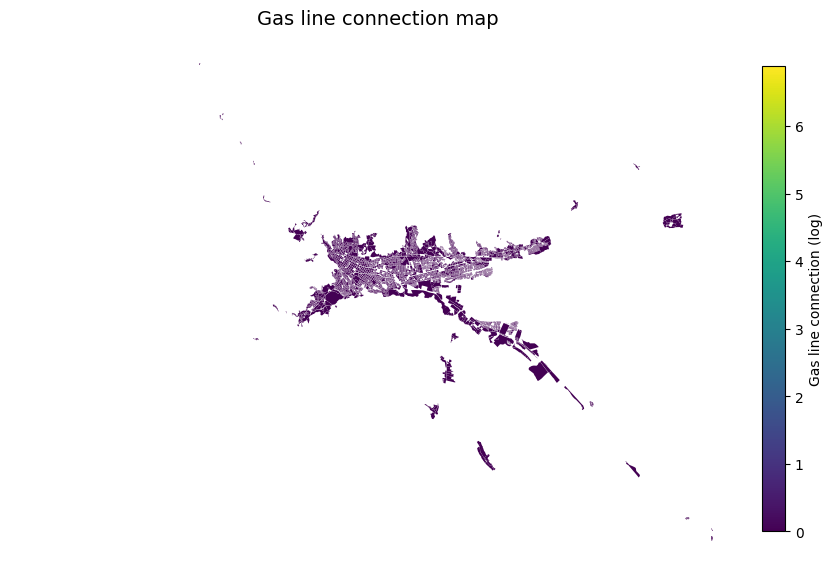

In [14]:
# Plot
fig, ax = plt.subplots(figsize=(10, 8))
# plot without automatic colorbar
gdf.plot(column='TP19_GAS_1_Log', cmap='viridis', ax=ax)

# Plot with custom colorbar
sm = plt.cm.ScalarMappable(cmap='viridis')
sm.set_array(gdf['TP19_GAS_1_Log'])
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.02)  # fraction controls the size of the colorbar
cbar.set_label("Gas line connection (log)")

ax.set_title("Gas line connection map", fontsize=14)
ax.set_axis_off()
plt.show()